In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('credit_score.csv')

In [3]:
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,26.822620,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,266.0,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,28.609352,267.0,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,268.0,No,49.574949,21.46538,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,269.0,No,49.574949,21.46538,High_spent_Medium_value_payments,341.489231,Good


In [4]:
df.isnull().sum()

ID                          0
Customer_ID                 0
Month                       0
Name                        0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X = np.array(df[["Annual_Income", "Monthly_Inhand_Salary", 
                   "Num_Bank_Accounts", "Num_Credit_Card", 
                   "Num_of_Loan","Interest_Rate", 
                   "Delay_from_due_date", "Num_of_Delayed_Payment", "Outstanding_Debt", 
                   "Credit_History_Age", "Monthly_Balance"]])
y = np.array(df["Credit_Score"])

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [8]:
from sklearn.ensemble import RandomForestClassifier

In [9]:
model = RandomForestClassifier()

In [10]:
model.fit(X_train,y_train)

RandomForestClassifier()

In [11]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix

In [12]:
y_pred = model.predict(X_test)

In [13]:
accuracy_score(y_test,y_pred)

0.8014

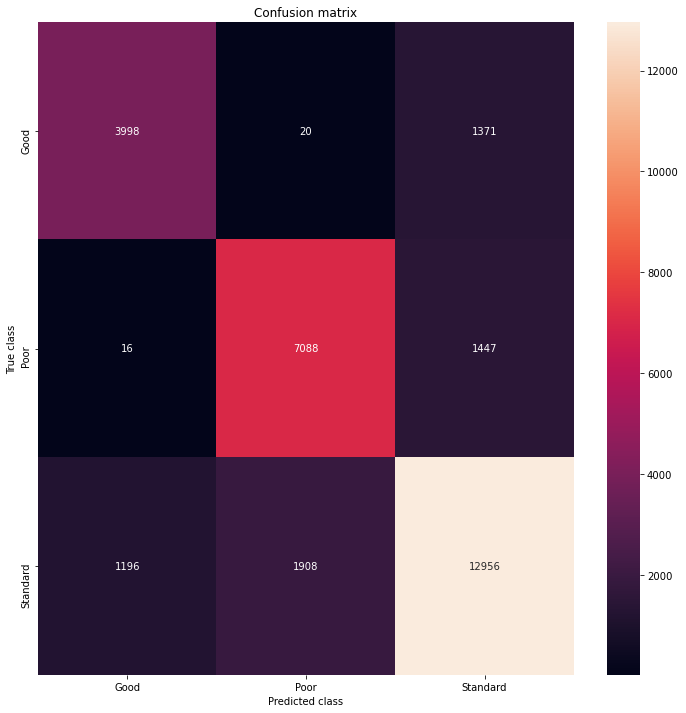

              precision    recall  f1-score   support

        Good       0.77      0.74      0.75      5389
        Poor       0.79      0.83      0.81      8551
    Standard       0.82      0.81      0.81     16060

    accuracy                           0.80     30000
   macro avg       0.79      0.79      0.79     30000
weighted avg       0.80      0.80      0.80     30000



In [14]:
LABELS = ['Good', 'Poor',"Standard"]
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS,
            yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()
print(classification_report(y_test, y_pred))

In [15]:
 print("Credit Score Prediction : ")
a = float(input("Annual Income: "))
b = float(input("Monthly Inhand Salary: "))
c = float(input("Number of Bank Accounts: "))
d = float(input("Number of Credit cards: "))
e = float(input("Number of Loans: "))
f = float(input("Interest rate: "))
g = float(input("Average number of days delayed by the person: "))
h = float(input("Number of delayed payments: "))
#i = input("Credit Mix (Bad: 0, Standard: 1, Good: 3) : ")
j = float(input("Outstanding Debt: "))
k = float(input("Credit History Age: "))
l = float(input("Monthly Balance: "))

features = np.array([[a, b, c, d, e, f, g, h, j, k, l]])
print("Predicted Credit Score = ", model.predict(features))

Credit Score Prediction : 
Annual Income: 1
Monthly Inhand Salary: 1
Number of Bank Accounts: 1
Number of Credit cards: 1
Number of Loans: 1
Interest rate: 1
Average number of days delayed by the person: 1
Number of delayed payments: 1
Outstanding Debt: 1
Credit History Age: 1
Monthly Balance: 1
Predicted Credit Score =  ['Good']


In [16]:
final_model= RandomForestClassifier()

In [17]:
final_model.fit(X, y)

RandomForestClassifier()

In [18]:
import joblib

In [19]:
joblib.dump(final_model,"credit_score_model.pkl")

['credit_score_model.pkl']

In [20]:
column_names = list(df[["Annual_Income", "Monthly_Inhand_Salary", 
                        "Num_Bank_Accounts", "Num_Credit_Card", 
                        "Num_of_Loan","Interest_Rate", 
                        "Delay_from_due_date", "Num_of_Delayed_Payment", "Outstanding_Debt", 
                        "Credit_History_Age", "Monthly_Balance"]].columns)

joblib.dump(column_names,'model_column_names.pkl')

['model_column_names.pkl']

In [21]:
col_names = joblib.load('model_column_names.pkl')

In [22]:
col_names

['Annual_Income',
 'Monthly_Inhand_Salary',
 'Num_Bank_Accounts',
 'Num_Credit_Card',
 'Num_of_Loan',
 'Interest_Rate',
 'Delay_from_due_date',
 'Num_of_Delayed_Payment',
 'Outstanding_Debt',
 'Credit_History_Age',
 'Monthly_Balance']

In [23]:
loaded_model = joblib.load('credit_score_model.pkl')

In [24]:
loaded_model.predict([[1,1,1,1,1,1,1,1,1,1,1]])

array(['Standard'], dtype=object)